In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

D:\FRAMEWORKS\anoconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
employee = pd.read_csv("Churn.csv") 
employee.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
employee = employee.drop(['customerID'],axis=1) 
employee.columns
employee['TotalCharges'] =employee["TotalCharges"].replace(" ",np.nan).astype(float)  
employee.isna().sum() 
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True)

C:\Users\ramsp\AppData\Local\Temp\ipykernel_18852\1890683186.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True)


In [9]:
employee.isna().sum() 

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
employee['Churn'] = employee['Churn'].map({'No':1,'Yes':0})
emp_encoded = pd.get_dummies(employee,drop_first=True)

In [5]:
x = emp_encoded.drop(columns=['Churn'],axis=1)
y = emp_encoded['Churn']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [7]:
model = RandomForestClassifier()

In [11]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(x_test)

In [13]:
result = pd.DataFrame({'Actuall':y_test,'predicted':y_pred})
result

,Actuall,predicted
1209,1,1
1777,1,1
3957,1,1
5890,1,1
6460,0,1
...,...,...
1638,1,1
2606,1,1
5252,1,1
4664,0,0


In [15]:
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

[[ 278  289]
 [ 138 1408]]


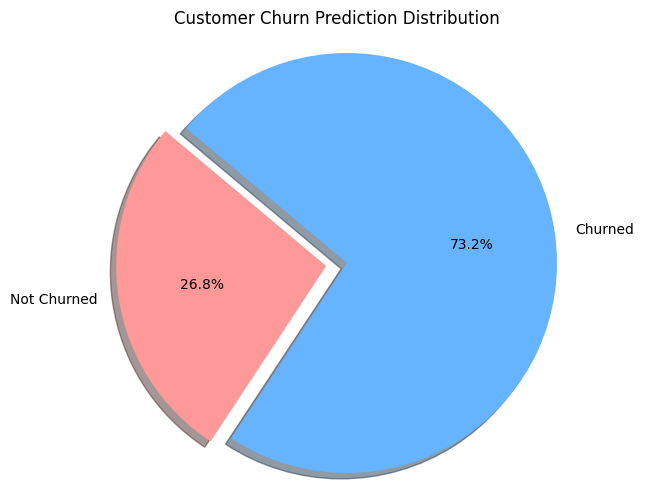

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred) 
print(conf_matrix) 
 
labels = ['Not Churned', 'Churned'] 
sizes = [conf_matrix[0, 0] + conf_matrix[0, 1], conf_matrix[1, 0] + conf_matrix[1, 1]] 
colors = ['#ff9999','#66b3ff'] 
explode = (0.1, 0) 
plt.figure(figsize=(8, 6)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', 
shadow=True, startangle=140) 
plt.title('Customer Churn Prediction Distribution') 
plt.axis('equal') 
plt.show()